In [1]:
import geodata
import xarray as xr
import logging
import matplotlib.pyplot as plt
from osgeo import gdal
import pandas as pd
logging.basicConfig(level=logging.INFO)
import warnings
warnings.filterwarnings('ignore')

In [2]:
DS_monthly_chn = geodata.Dataset(module="merra2",
					 years=slice(2011, 2011),
					 months=slice(1,1),
                     weather_data_config = "surface_flux_monthly")

INFO:geodata.dataset:Directory C:/Users/User/Documents/geodata_data/merra2/ found, checking for completeness.
INFO:geodata.dataset:Directory complete.


In [3]:
if DS_monthly_chn.prepared == False:
	DS_monthly_chn.get_data()

In [4]:
ds = xr.open_dataset(DS_monthly_chn.downloadedFiles[0][1])
ds.data_vars

Data variables:
    ustar    (time, lat, lon) float32 ...
    z0m      (time, lat, lon) float32 ...
    disph    (time, lat, lon) float32 ...
    rhoa     (time, lat, lon) float32 ...
    ulml     (time, lat, lon) float32 ...
    vlml     (time, lat, lon) float32 ...
    tstar    (time, lat, lon) float32 ...
    hlml     (time, lat, lon) float32 ...
    tlml     (time, lat, lon) float32 ...
    pblh     (time, lat, lon) float32 ...
    hflux    (time, lat, lon) float32 ...
    eflux    (time, lat, lon) float32 ...

In [5]:
DS_monthly_chn.trim_variables()

In [6]:
## Variables after trimming
ds = xr.open_dataset(DS_monthly_chn.downloadedFiles[0][1])
list(ds.data_vars)

['ustar',
 'z0m',
 'disph',
 'rhoa',
 'ulml',
 'vlml',
 'tstar',
 'hlml',
 'tlml',
 'pblh',
 'hflux',
 'eflux']

In [7]:
## CUTOUT
cutout = geodata.Cutout(name = "china-2011-1-test",
                       module = "merra2",
                       weather_data_config = "surface_flux_monthly",
                       xs = slice(73, 136),
                       ys = slice(18, 54),
                       years = slice(2011, 2011), 
                       months = slice(1,1))

INFO:geodata.cutout:All cutout (china-2011-1-test, C:/Users/User/Documents/geodata_data/cutouts/) files available.
INFO:geodata.preparation:[4, 1, 1, 10]
INFO:geodata.cutout:Cutout subset prepared: <Cutout china-2011-1-test x=73.12-135.62 y=18.00-54.00 time=2011/1-2011/1 prepared>


In [8]:
cutout.prepare()

INFO:geodata.preparation:The cutout is already prepared. If you want to recalculate it, supply an `overwrite=True` argument.


True

In [9]:
cutout.__dict__

{'name': 'china-2011-1-test',
 'cutout_dir': 'C:/Users/User/Documents/geodata_data/cutouts/china-2011-1-test',
 'prepared': True,
 'meta_append': 0,
 'config': 'surface_flux_monthly',
 'meta': <xarray.Dataset>
 Dimensions:     (time: 1, x: 101, y: 73, year-month: 1)
 Coordinates:
   * x           (x) float64 73.12 73.75 74.38 75.0 ... 133.8 134.4 135.0 135.6
   * y           (y) float64 18.0 18.5 19.0 19.5 20.0 ... 52.5 53.0 53.5 54.0
   * time        (time) datetime64[ns] 2011-01-01
     lon         (x) float64 ...
     lat         (y) float64 ...
   * year-month  (year-month) MultiIndex
   - year        (year-month) int64 2011
   - month       (year-month) int64 1
 Data variables:
     *empty*
 Attributes:
     History:                           Original file generated: Mon Jun 22 23...
     Filename:                          MERRA2_400.tavgM_2d_flx_Nx.201101.nc4
     Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
     Conventions:                       

In [10]:
cutout.coords

Coordinates:
  * x           (x) float64 73.12 73.75 74.38 75.0 ... 133.8 134.4 135.0 135.6
  * y           (y) float64 18.0 18.5 19.0 19.5 20.0 ... 52.5 53.0 53.5 54.0
  * time        (time) datetime64[ns] 2011-01-01
    lon         (x) float64 ...
    lat         (y) float64 ...
  * year-month  (year-month) MultiIndex
  - year        (year-month) int64 2011
  - month       (year-month) int64 1

In [11]:
cutout

<Cutout china-2011-1-test x=73.12-135.62 y=18.00-54.00 time=2011/1-2011/1 prepared>

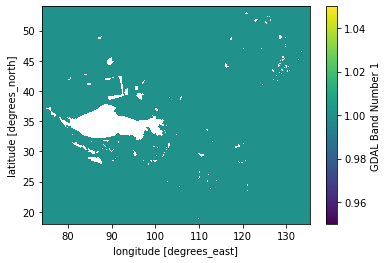

In [71]:
#gdal_ds = gdal.Translate('FINAL_GRID_5BINS_FOREST_MED.nc', 'FINAL_GRID_5BINS_FOREST_MED.tif', format = 'NetCDF')
xarray_ds_forest = xr.open_dataset('FINAL_GRID_5BINS_FOREST_MED.nc')

xarray_ds_forest['Band1'].plot()

# forest_df['Band1'].unique()

In [73]:
xarray_ds_forest

<xarray.Dataset>
Dimensions:  (lat: 4321, lon: 7360)
Coordinates:
  * lat      (lat) float64 18.0 18.0 18.01 18.02 ... 53.97 53.98 53.99 54.0
  * lon      (lon) float64 74.0 74.01 74.02 74.03 ... 135.3 135.3 135.3 135.3
Data variables:
    crs      |S1 b''
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.1.3, released 2020/09/01
    history:             Tue Oct 27 18:42:31 2020: GDAL CreateCopy( FINAL_GRI...

In [134]:
ds_wind = geodata.convert.wind(cutout,
                               turbine='Suzlon_S82_1.5_MW',
                               smooth=True, 
                               var_height='lml')
ds_wind

<xarray.DataArray (time: 1, y: 73, x: 101)>
array([[[0.02014039, 0.025782  , 0.02271231, ..., 0.59035825,
         0.57860215, 0.56344352],
        [0.02125767, 0.02074308, 0.01410224, ..., 0.56713468,
         0.55380957, 0.53740686],
        [0.01712153, 0.01659648, 0.00947699, ..., 0.53907608,
         0.52184841, 0.50636445],
        ...,
        [0.00924701, 0.00816818, 0.00911262, ..., 0.00658347,
         0.04304676, 0.06909421],
        [0.00914878, 0.00966224, 0.01023961, ..., 0.00792092,
         0.0642353 , 0.13747146],
        [0.01111723, 0.01150966, 0.01079445, ..., 0.00424388,
         0.08917244, 0.26786677]]])
Coordinates:
  * x        (x) float64 73.12 73.75 74.38 75.0 ... 133.8 134.4 135.0 135.6
  * y        (y) float64 18.0 18.5 19.0 19.5 20.0 ... 52.0 52.5 53.0 53.5 54.0
  * time     (time) datetime64[ns] 2011-01-01T00:30:00
    lon      (x) float64 73.12 73.75 74.38 75.0 ... 133.8 134.4 135.0 135.6
    lat      (y) float64 18.0 18.5 19.0 19.5 20.0 ... 52.0 52.5 53.0 53.5 54.0

In [147]:
ds_wind = geodata.convert.wind(cutout,
                               turbine='Suzlon_S82_1.5_MW',
                               smooth=True, 
                               var_height='lml')
ds_wind = ds_wind.reset_coords(['lon', 'lat'], drop = True)
#ds_wind = ds_wind.reset_coords(['time'], drop = True)


#ds_wind = ds_wind.drop_vars('time')
ds_wind = ds_wind.rename({'x': 'lon', 'y': 'lat'})
xarray_ds_wind = ds_wind.to_dataset(name = 'wind')
# test = xarray_ds_wind.to_dataframe()
# xarray_ds_wind = test.reset_index('time', drop = True).to_xarray()
xarray_ds_wind

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 101, time: 1)
Coordinates:
  * lon      (lon) float64 73.12 73.75 74.38 75.0 ... 133.8 134.4 135.0 135.6
  * lat      (lat) float64 18.0 18.5 19.0 19.5 20.0 ... 52.0 52.5 53.0 53.5 54.0
  * time     (time) datetime64[ns] 2011-01-01T00:30:00
Data variables:
    wind     (time, lat, lon) float64 0.02014 0.02578 0.02271 ... 0.08917 0.2679

In [148]:
xarray_ds_forest

<xarray.Dataset>
Dimensions:  (lat: 4321, lon: 7360)
Coordinates:
  * lat      (lat) float64 18.0 18.0 18.01 18.02 ... 53.97 53.98 53.99 54.0
  * lon      (lon) float64 74.0 74.01 74.02 74.03 ... 135.3 135.3 135.3 135.3
Data variables:
    crs      |S1 b''
    Band1    (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.1.3, released 2020/09/01
    history:             Tue Oct 27 18:42:31 2020: GDAL CreateCopy( FINAL_GRI...

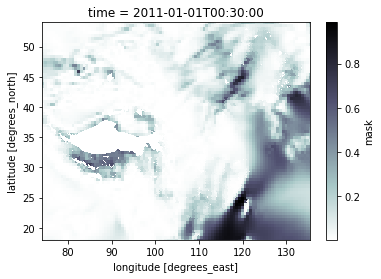

In [156]:
res_xarray_wind = xarray_ds_wind.reindex_like(xarray_ds_forest, method = 'nearest')
res_xarray_wind['Band1'] = xarray_ds_forest['Band1']
res_xarray_wind['mask'] = res_xarray_wind['wind'] * res_xarray_wind['Band1']
res_xarray_wind['mask'].plot(cmap = 'bone_r')

In [23]:
forest_df['Band1'] = forest_df['Band1'].fillna(0).astype(int)
forest_df['Band1'] = forest_df['Band1'].replace({0:1, 1:0})
forest = forest_df.reset_index()
forest['Band1'].unique()

array([0, 1], dtype=int64)

In [16]:
forest[forest['Band1'] == 0]

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,lat,lon,crs,Band1
158827,18.170834,109.562500,b'',0
158828,18.170834,109.570833,b'',0
166187,18.179167,109.562500,b'',0
166188,18.179167,109.570833,b'',0
166189,18.179167,109.579166,b'',0
...,...,...,...,...
31411070,53.554169,123.587500,b'',0
31411071,53.554169,123.595834,b'',0
31411072,53.554169,123.604167,b'',0
31418395,53.562502,123.295834,b'',0


In [17]:
forest.shape

(31802560, 4)

In [18]:
df_wind = df_wind.reset_index(drop = True)
df_wind

,lon,lat,wind
0,73.125,18.0,0.020140
1,73.750,18.0,0.025782
2,74.375,18.0,0.022712
3,75.000,18.0,0.026013
4,75.625,18.0,0.038022
...,...,...,...
7368,133.125,54.0,0.001480
7369,133.750,54.0,0.002378
7370,134.375,54.0,0.004244
7371,135.000,54.0,0.089172


In [19]:
df_wind['lat'].unique()

array([18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5, 23. ,
       23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5,
       29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. ,
       34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5,
       40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5, 45. ,
       45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5, 50. , 50.5,
       51. , 51.5, 52. , 52.5, 53. , 53.5, 54. ])

In [20]:
def change_resolution(lon_lat_pair, df):
    smallest_lon = 73.125
    smallest_lat = 18
    step_lon = 0.625
    step_lat = 0.5
    new_df = pd.DataFrame(columns = ['lon', 'lat', 'wind'])
    dfs = []
    for i in lon_lat_pair:
        lon_wind = float(abs(i[0] - smallest_lon)//step_lon) * step_lon + smallest_lon
        lat_wind = float(abs(i[1] - smallest_lat)//step_lat) * step_lat + smallest_lat
        #print(lon_wind, lat_wind)
        row = df[df['lon'] == lon_wind][df['lat'] == lat_wind]
        row['lon'] = i[0]
        row['lat'] = i[1]
        row = row.reset_index(drop = True)
        dfs.append(row)
    new_df = pd.concat(dfs, axis = 0)
    return new_df.reset_index(drop = True)

In [21]:
forest_test = forest.iloc[130000:180000]
lat_test = forest_test['lat'].values
lon_test = forest_test['lon'].values
lon_lat_test = []
for i in range(len(lat_test)):
    lon_lat_test.append((lon_test[i], lat_test[i]))
result_test = change_resolution(lon_lat_test, df_wind)
result_test

,lon,lat,wind
0,114.670833,18.137500,0.887230
1,114.679167,18.137500,0.887230
2,114.687500,18.137500,0.887230
3,114.695833,18.137500,0.887230
4,114.704167,18.137500,0.887230
...,...,...,...
49995,101.962499,18.195834,0.037241
49996,101.970833,18.195834,0.037241
49997,101.979166,18.195834,0.037241
49998,101.987499,18.195834,0.037241


In [22]:
top10000 = forest_test['Band1']
top10000.unique()

array([1, 0])

In [23]:
final_band = forest_test['Band1'].reset_index(drop = True)
result_test['band'] = final_band
result_test

,lon,lat,wind,band
0,114.670833,18.137500,0.887230,1
1,114.679167,18.137500,0.887230,1
2,114.687500,18.137500,0.887230,1
3,114.695833,18.137500,0.887230,1
4,114.704167,18.137500,0.887230,1
...,...,...,...,...
49995,101.962499,18.195834,0.037241,1
49996,101.970833,18.195834,0.037241,1
49997,101.979166,18.195834,0.037241,1
49998,101.987499,18.195834,0.037241,1


In [24]:
result_test['mask'] = result_test['wind'] * result_test['band']
result_test

,lon,lat,wind,band,mask
0,114.670833,18.137500,0.887230,1,0.887230
1,114.679167,18.137500,0.887230,1,0.887230
2,114.687500,18.137500,0.887230,1,0.887230
3,114.695833,18.137500,0.887230,1,0.887230
4,114.704167,18.137500,0.887230,1,0.887230
...,...,...,...,...,...
49995,101.962499,18.195834,0.037241,1,0.037241
49996,101.970833,18.195834,0.037241,1,0.037241
49997,101.979166,18.195834,0.037241,1,0.037241
49998,101.987499,18.195834,0.037241,1,0.037241


In [25]:
result_test = result_test.set_index(['lon', 'lat'])
result_test

,,wind,band,mask
lon,lat,,,
114.670833,18.137500,0.887230,1,0.887230
114.679167,18.137500,0.887230,1,0.887230
114.687500,18.137500,0.887230,1,0.887230
114.695833,18.137500,0.887230,1,0.887230
114.704167,18.137500,0.887230,1,0.887230
...,...,...,...,...
101.962499,18.195834,0.037241,1,0.037241
101.970833,18.195834,0.037241,1,0.037241
101.979166,18.195834,0.037241,1,0.037241


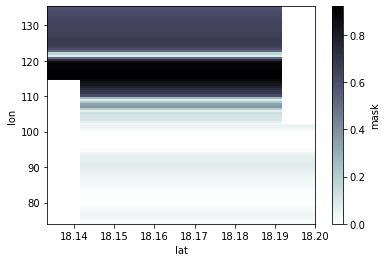

In [26]:
result_test.to_xarray()['mask'].plot(cmap = "bone_r")